# Exploratory Data Analysis

In [ ]:
import random
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display

PROJECT_ROOT = Path("/Users/chang/Dropbox/UTAustin/Deep Learning/project")
SPLITS = {
    "train": PROJECT_ROOT / "data/MVSA/splits/train.csv",
    "valid": PROJECT_ROOT / "data/MVSA/splits/valid.csv",
    "test": PROJECT_ROOT / "data/MVSA/splits/test.csv",
}

# Load all splits
dfs = {name: pd.read_csv(path) for name, path in SPLITS.items()}
for name, df in dfs.items():
    print(f"{name}: {len(df)} rows, columns: {list(df.columns)}")


train: 11041 rows, columns: ['id', 'text_path', 'image_path', 'text_label', 'image_label', 'combined_label']
valid: 1380 rows, columns: ['id', 'text_path', 'image_path', 'text_label', 'image_label', 'combined_label']
test: 1381 rows, columns: ['id', 'text_path', 'image_path', 'text_label', 'image_label', 'combined_label']


In [3]:
# Class balance (change column based on modality)
target_col = "combined_label"  # or "text_label" / "image_label"
class_counts = pd.concat([dfs["train"][target_col].value_counts(normalize=True).rename(name) for name in ["train", "valid", "test"]], axis=1)
print("\nClass distribution (fraction):")
display(class_counts.fillna(0))


Class distribution (fraction):


,train,valid,test
combined_label,,,
positive,0.549588,0.549588,0.549588
neutral,0.406485,0.406485,0.406485
negative,0.043927,0.043927,0.043927



Text length (chars) train: mean=88.0, median=97.0, min=2, max=144


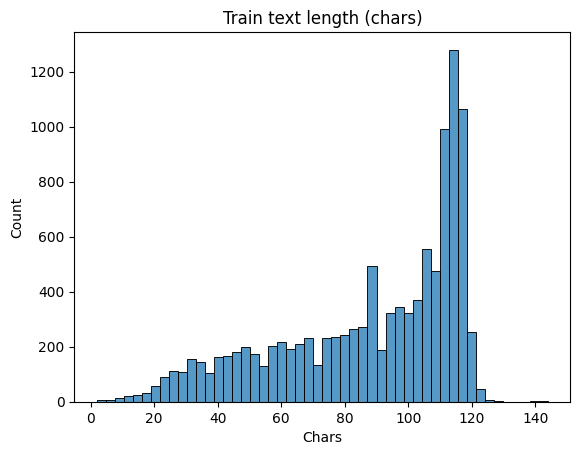

In [4]:
# Text length stats (characters)
def text_length_series(df):
    return df["text_path"].apply(lambda p: len(Path(p).read_text(encoding="utf-8")))

lens = text_length_series(dfs["train"])
print(f"\nText length (chars) train: mean={lens.mean():.1f}, median={lens.median():.1f}, min={lens.min()}, max={lens.max()}")

sns.histplot(lens, bins=50)
plt.title("Train text length (chars)")
plt.xlabel("Chars")
plt.show()

idx=9033
Labels: text=positive, image=positive, combined=positive
Text:
You now have plans. THIS SAT @RainbowJeans416 celebrates 40 yrs with a #BlockParty!!! http://t.co/15XkTjvhEv


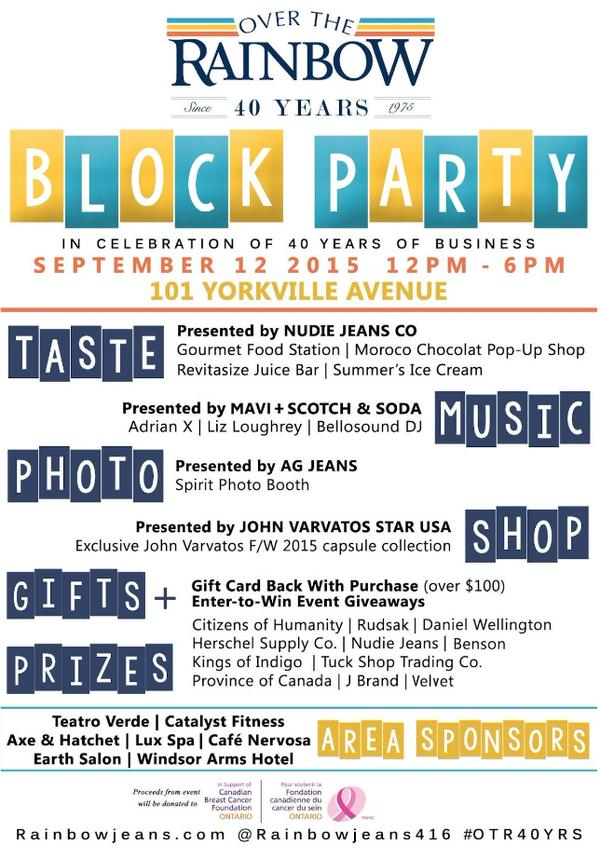

In [5]:
# Peek at a random sample (text + image)
def show_sample(df, idx=None):
    if idx is None:
        idx = random.randrange(len(df))
    row = df.iloc[idx]
    text = Path(row["text_path"]).read_text(encoding="utf-8").strip()
    img = Image.open(row["image_path"]).convert("RGB")
    print(f"idx={idx}")
    print(f"Labels: text={row.get('text_label')}, image={row.get('image_label')}, combined={row.get('combined_label')}")
    print(f"Text:\n{text[:500]}{'...' if len(text) > 500 else ''}")
    display(img)

show_sample(dfs["train"])